In [1]:
import pandas as pd
import pickle
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [8]:
trial = pd.read_pickle("./voxc_trial.pkl")
sv_df = pd.read_pickle("../dataset/dataframes/voxc/sv_voxc_dataframe.pkl")

In [6]:
voxc1_meta = pd.read_csv("../dataset/voxceleb1/vox1_meta.csv", delimiter="\t")

## Scores

In [10]:
scores = np.load("../voxceleb1_test_xvectors/cosine_scores.npy")

In [12]:
trial['score'] = scores

In [13]:
pos_trials = trial[(trial.label == 1)]
neg_trials = trial[(trial.label == 0)]

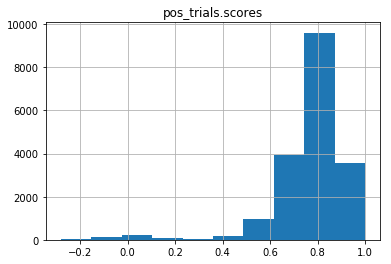

In [32]:
plt.title("pos_trials.scores")
pos_trials.score.hist()

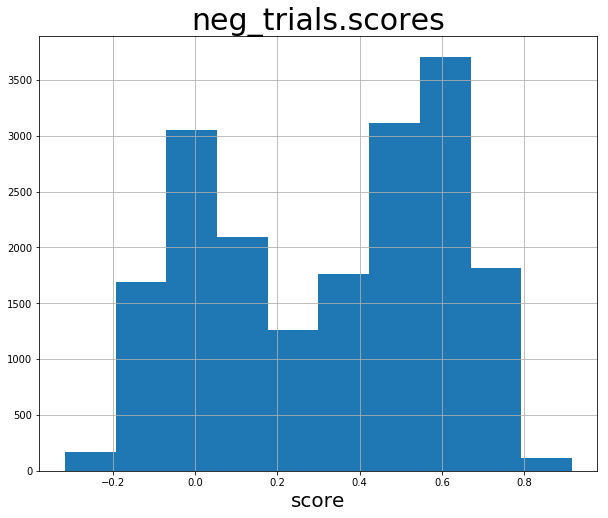

In [56]:
plt.figure(figsize=(10,8))
plt.title("neg_trials.scores", fontsize=30)
plt.xlabel("score", fontsize=20)
neg_trials.score.hist()

###  Gender

In [14]:
neg_equal_gender = neg_trials[neg_trials.gender_equal]
neg_diff_gender = neg_trials[~neg_trials.gender_equal]

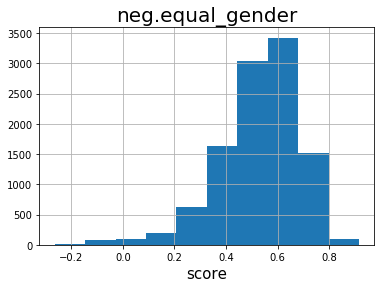

In [53]:
plt.title("neg.equal_gender", fontsize=20)
# plt.xlim(0, 1.0)
plt.xlabel("score", fontsize=15)
subplot = neg_equal_gender.score.hist()
# subplot.set_xlim(0, 1.0)

In [27]:
neg_equal_gender.score.describe()

count    10727.000000
mean         0.529184
std          0.156829
min         -0.264094
25%          0.445615
50%          0.550163
75%          0.639767
max          0.915815
Name: score, dtype: float64

Text(0.5,1,'diff_gender')

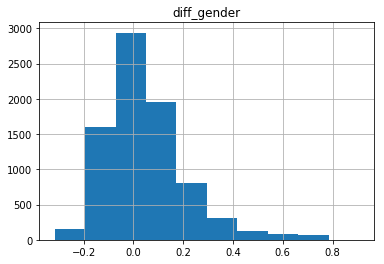

In [58]:
subplot = neg_diff_gender.score.hist()
plt.title("diff_gender")
# subplot.set_xlim(0, 1.0)

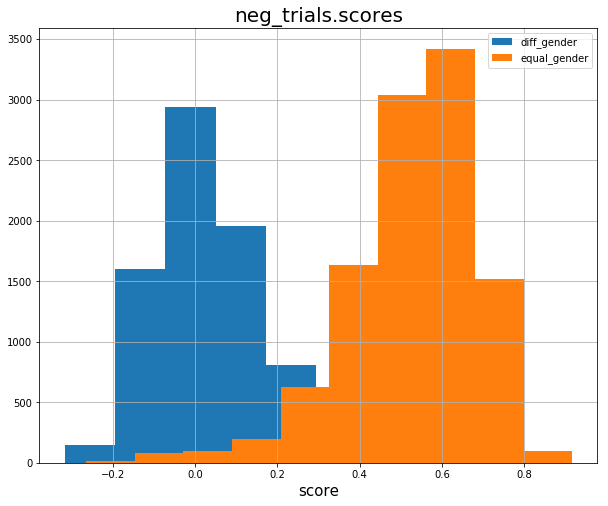

In [81]:
plt.figure(figsize=(10,8))
plt.title("neg_trials.scores", fontsize=20)
plt.xlabel("score", fontsize=15)
subplot1 = neg_diff_gender.score.hist(label='diff_gender')
subplot2 = neg_equal_gender.score.hist(label='equal_gender')
plt.legend()

### 만약 gender 정보를 미리 알고 있었다면?

같은 gender 케이스의 트라이얼만 가지고 eer 계산하면

In [119]:
score_vector = pos_trials.score.tolist() + neg_trials.score.tolist()
label_vector = [1] * len(pos_trials) + [0] * len(neg_trials)
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(
        label_vector, score_vector, pos_label=1)
eer = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]
eer

0.1268235544670429

In [114]:
score_vector = pos_trials.score.tolist() + neg_equal_gender.score.tolist()
label_vector = [1] * len(pos_trials) + [0] * len(neg_equal_gender)

from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(
        label_vector, score_vector, pos_label=1)
eer = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]
eer

다른 gender 케이스의 트라이얼만 가지고 eer 계산하면

In [116]:
score_vector = pos_trials.score.tolist() + neg_diff_gender.score.tolist()
label_vector = [1] * len(pos_trials) + [0] * len(neg_diff_gender)

from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(
        label_vector, score_vector, pos_label=1)
eer = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]
eer

### Nationality

In [25]:
pos_equal_nation = pos_trials[pos_trials.nation_equal]
neg_equal_nation = neg_trials[neg_trials.nation_equal]
neg_diff_nation = neg_trials[~neg_trials.nation_equal]

In [28]:
neg_diff_gender.score.describe()

count    8055.000000
mean        0.050804
std         0.164141
min        -0.316109
25%        -0.060529
50%         0.023160
75%         0.123077
max         0.906118
Name: score, dtype: float64

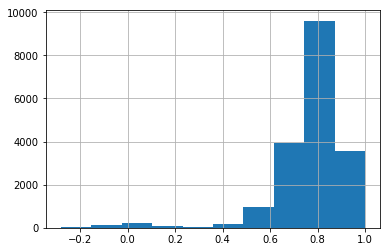

In [26]:
plt.title("pos_equal_nation")
pos_equal_nation.score.hist()

Text(0.5,1,'equal_nation')

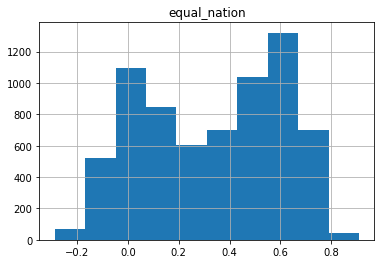

In [40]:
neg_equal_nation.score.hist()
plt.title("equal_nation")
# plt.xlim(0, 1.0)

In [19]:
neg_equal_nation.score.describe()

count    6938.000000
mean        0.335739
std         0.272778
min        -0.288233
25%         0.077859
50%         0.370249
75%         0.579068
max         0.909149
Name: score, dtype: float64

Text(0.5,1,'diff_nation')

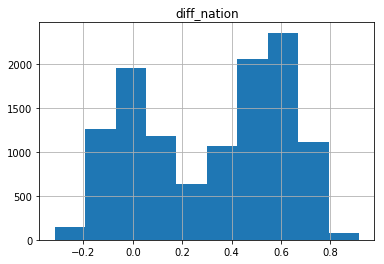

In [42]:
neg_diff_nation.score.hist()
plt.title("diff_nation")
# plt.xlim(0, 1.0)

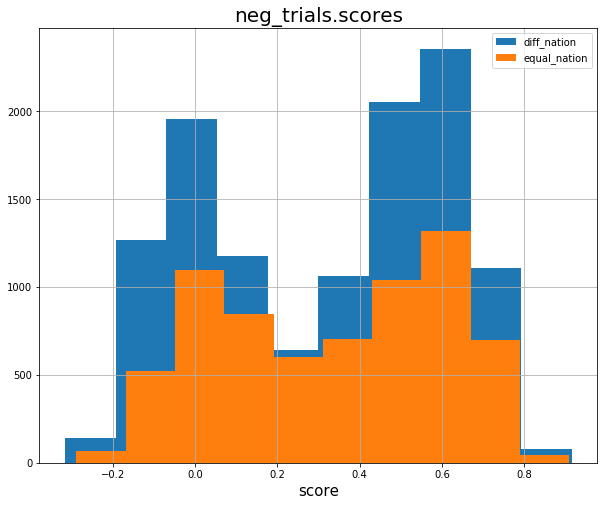

In [82]:
plt.figure(figsize=(10,8))
plt.title("neg_trials.scores", fontsize=20)
plt.xlabel("score", fontsize=15)
subplot1 = neg_diff_nation.score.hist(label='diff_nation')
subplot2 = neg_equal_nation.score.hist(label='equal_nation')
plt.legend()

In [22]:
neg_diff_nation.score.describe()

count    11844.000000
mean         0.317158
std          0.292887
min         -0.316109
25%          0.024147
50%          0.396064
75%          0.575767
max          0.915815
Name: score, dtype: float64

### Duration diff

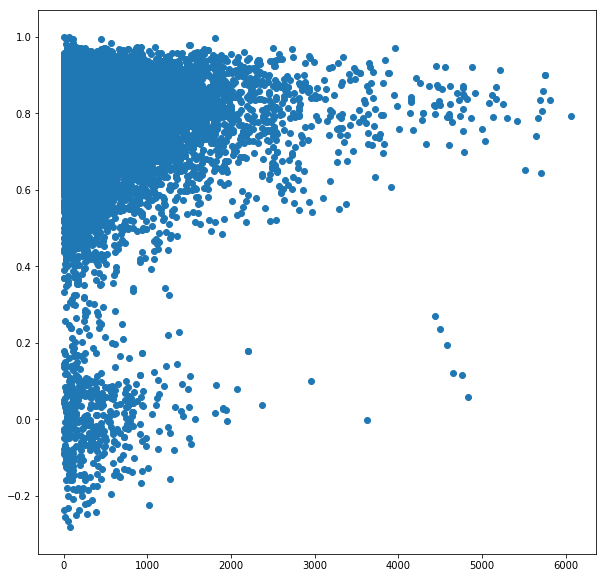

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(pos_trials.frame_diff, pos_trials.score)

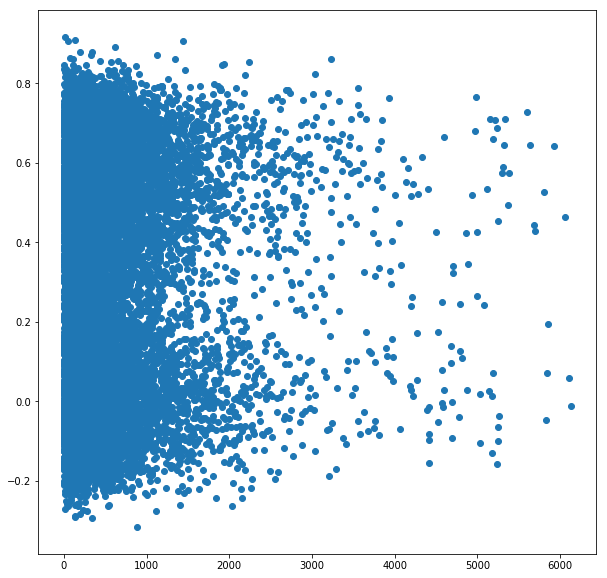

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(neg_trials.frame_diff, neg_trials.score)